In [1]:
import pandas as pd

In [5]:
# Load the datasets
users = pd.read_csv(r"C:\Users\Subramani mokkala\OneDrive\Desktop\Subbu\Projects\player-churn-analysis\data\raw\users.csv")
sessions = pd.read_csv(r"C:\Users\Subramani mokkala\OneDrive\Desktop\Subbu\Projects\player-churn-analysis\data\raw\user_sessions.csv")
purchases = pd.read_csv(r"C:\Users\Subramani mokkala\OneDrive\Desktop\Subbu\Projects\player-churn-analysis\data\raw\user_purchases.csv")

In [6]:
print("Users dataset shape:", users.shape)
display(users.head())

print("Sessions dataset shape:", sessions.shape)
display(sessions.head())

print("Purchases dataset shape:", purchases.shape)
display(purchases.head())

Users dataset shape: (6584, 4)


,user_id,join_date,os,country
0,157844,2021-12-05,Android,United States
1,583785,2022-06-25,iOS,Germany
2,152828,2021-12-04,iOS,United States
3,948940,2022-09-19,Android,Spain
4,1141021,2022-12-25,Android,Austria


Sessions dataset shape: (1699352, 5)


,user_id,dt,session_id,session_duration_sec,level_completed
0,567638,2022-06-30,1656557867,3141,9.0
1,436895,2022-06-30,1656581942,2419,7.0
2,443735,2022-06-30,1656548061,6391,3.0
3,441407,2022-06-30,1656604859,1743,4.0
4,145625,2022-06-30,1656583677,1265,3.0


Purchases dataset shape: (236270, 3)


,user_id,dt,price_usd
0,424859,2022-06-02,5.65
1,360664,2022-06-02,2.33
2,424859,2022-06-02,5.65
3,470675,2022-06-02,2.25
4,522906,2022-06-02,3.51


In [7]:
# Check missing values
print("Missing values in Users dataset:\n", users.isnull().sum())

# Check data types
print("\nData types:\n", users.dtypes)

# Quick statistics for categorical columns
print("\nOS distribution:\n", users['os'].value_counts())
print("\nCountry distribution:\n", users['country'].value_counts())

Missing values in Users dataset:
 user_id      0
join_date    0
os           0
country      1
dtype: int64

Data types:
 user_id       int64
join_date    object
os           object
country      object
dtype: object

OS distribution:
 os
Android    4266
iOS        2318
Name: count, dtype: int64

Country distribution:
 country
United Kingdom    1531
United States     1439
Germany            418
Spain              260
Chile              237
                  ... 
Montenegro           1
Paraguay             1
Faroe Islands        1
St. Lucia            1
Uzbekistan           1
Name: count, Length: 124, dtype: int64


In [8]:
# Check missing values
print("Missing values in Sessions dataset:\n", sessions.isnull().sum())

# Data types
print("\nData types:\n", sessions.dtypes)

# Quick statistics for numeric columns
print("\nSession duration stats:\n", sessions['session_duration_sec'].describe())
print("\nLevel completed stats:\n", sessions['level_completed'].describe())

Missing values in Sessions dataset:
 user_id                       0
dt                            0
session_id                    0
session_duration_sec          0
level_completed         1398023
dtype: int64

Data types:
 user_id                   int64
dt                       object
session_id                int64
session_duration_sec      int64
level_completed         float64
dtype: object

Session duration stats:
 count    1.699352e+06
mean     6.701641e+02
std      1.389196e+03
min      0.000000e+00
25%      8.800000e+01
50%      2.600000e+02
75%      7.240000e+02
max      1.584350e+05
Name: session_duration_sec, dtype: float64

Level completed stats:
 count    301329.000000
mean          1.978864
std           2.386358
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          70.000000
Name: level_completed, dtype: float64


In [9]:
# Check missing values
print("Missing values in Purchases dataset:\n", purchases.isnull().sum())

# Data types
print("\nData types:\n", purchases.dtypes)

# Quick statistics for numeric column
print("\nPrice (USD) stats:\n", purchases['price_usd'].describe())


Missing values in Purchases dataset:
 user_id        0
dt             0
price_usd    109
dtype: int64

Data types:
 user_id        int64
dt            object
price_usd    float64
dtype: object

Price (USD) stats:
 count    236161.000000
mean          4.076050
std           3.979209
min           0.620000
25%           1.990000
50%           3.060000
75%           5.170000
max         110.040000
Name: price_usd, dtype: float64


In [10]:
# Fill missing levels with 0
sessions['level_completed'] = sessions['level_completed'].fillna(0)

# Convert dt to datetime
sessions['dt'] = pd.to_datetime(sessions['dt'])
users['join_date'] = pd.to_datetime(users['join_date'])

# Aggregate session data per user
session_agg = sessions.groupby('user_id').agg(
    total_play_time_sec=('session_duration_sec', 'sum'),
    avg_session_time_sec=('session_duration_sec', 'mean'),
    total_sessions=('session_id', 'count'),
    total_levels_completed=('level_completed', 'sum'),
    avg_levels_completed=('level_completed', 'mean')
).reset_index()

session_agg.head()


,user_id,total_play_time_sec,avg_session_time_sec,total_sessions,total_levels_completed,avg_levels_completed
0,13270,251851,747.332344,337,40.0,0.118694
1,13858,205949,827.104418,249,48.0,0.192771
2,14363,236817,611.930233,387,144.0,0.372093
3,17775,320289,802.729323,399,64.0,0.160401
4,19787,685456,766.729306,894,91.0,0.101790


In [11]:
# Fill missing price values with 0
purchases['price_usd'] = purchases['price_usd'].fillna(0)

# Convert dt to datetime
purchases['dt'] = pd.to_datetime(purchases['dt'])

# Aggregate purchases per user
purchase_agg = purchases.groupby('user_id').agg(
    total_spent_usd=('price_usd', 'sum'),
    num_purchases=('price_usd', 'count'),
    avg_purchase_usd=('price_usd', 'mean')
).reset_index()

purchase_agg.head()


,user_id,total_spent_usd,num_purchases,avg_purchase_usd
0,957,4.40,1,4.4000
1,1998,6.41,2,3.2050
2,2003,13.39,2,6.6950
3,2008,33.58,8,4.1975
4,2011,3.40,1,3.4000


In [12]:
# Start with users table
player_df = users.copy()

# Merge session features
player_df = player_df.merge(session_agg, on='user_id', how='left')

# Merge purchase features
player_df = player_df.merge(purchase_agg, on='user_id', how='left')

# Fill NaN values for users with no sessions or purchases
player_df[['total_play_time_sec', 'avg_session_time_sec', 'total_sessions',
           'total_levels_completed', 'avg_levels_completed']] = player_df[[
               'total_play_time_sec', 'avg_session_time_sec', 'total_sessions',
               'total_levels_completed', 'avg_levels_completed']].fillna(0)

player_df[['total_spent_usd', 'num_purchases', 'avg_purchase_usd']] = player_df[[
               'total_spent_usd', 'num_purchases', 'avg_purchase_usd']].fillna(0)

# Quick look at merged dataset
player_df.head()


,user_id,join_date,os,country,total_play_time_sec,avg_session_time_sec,total_sessions,total_levels_completed,avg_levels_completed,total_spent_usd,num_purchases,avg_purchase_usd
0,157844,2021-12-05,Android,United States,261631.0,499.295802,524.0,134.0,0.255725,84.77,23.0,3.685652
1,583785,2022-06-25,iOS,Germany,16111.0,1790.111111,9.0,54.0,6.000000,327.21,12.0,27.267500
2,152828,2021-12-04,iOS,United States,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000
3,948940,2022-09-19,Android,Spain,11531.0,2882.750000,4.0,12.0,3.000000,126.61,21.0,6.029048
4,1141021,2022-12-25,Android,Austria,56428.0,5129.818182,11.0,45.0,4.090909,101.82,15.0,6.788000


In [13]:
import datetime as dt

# Example: consider a player churned if no sessions in the last 30 days from last date in dataset
last_session_date = sessions['dt'].max()  # last date in the sessions table
cutoff_date = last_session_date - pd.Timedelta(days=30)

# Find last session date per user
last_played = sessions.groupby('user_id')['dt'].max().reset_index()
last_played.rename(columns={'dt':'last_session_date'}, inplace=True)

# Merge with player_df
player_df = player_df.merge(last_played, on='user_id', how='left')

# Create churn column: 1 if last session < cutoff_date, else 0
player_df['churned'] = (player_df['last_session_date'] < cutoff_date).astype(int)

# Quick check
player_df[['user_id','last_session_date','churned']].head()
player_df['churned'].value_counts(normalize=True)


churned
0    0.624696
1    0.375304
Name: proportion, dtype: float64

In [14]:
# Drop columns not used for features
X = player_df.drop(columns=['user_id','join_date','last_session_date','churned'])
y = player_df['churned']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['os','country'], drop_first=True)

# Quick check
X.head()


,total_play_time_sec,avg_session_time_sec,total_sessions,total_levels_completed,avg_levels_completed,total_spent_usd,num_purchases,avg_purchase_usd,os_iOS,country_Argentina,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Zambia
0,261631.0,499.295802,524.0,134.0,0.255725,84.77,23.0,3.685652,False,False,...,False,False,False,False,True,False,False,False,False,False
1,16111.0,1790.111111,9.0,54.0,6.000000,327.21,12.0,27.267500,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,True,False,...,False,False,False,False,True,False,False,False,False,False
3,11531.0,2882.750000,4.0,12.0,3.000000,126.61,21.0,6.029048,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56428.0,5129.818182,11.0,45.0,4.090909,101.82,15.0,6.788000,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train a baseline Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       823
           1       0.70      0.57      0.63       494

    accuracy                           0.75      1317
   macro avg       0.74      0.71      0.72      1317
weighted avg       0.74      0.75      0.74      1317


Confusion Matrix:
 [[704 119]
 [212 282]]

ROC-AUC Score: 0.8049596371525131


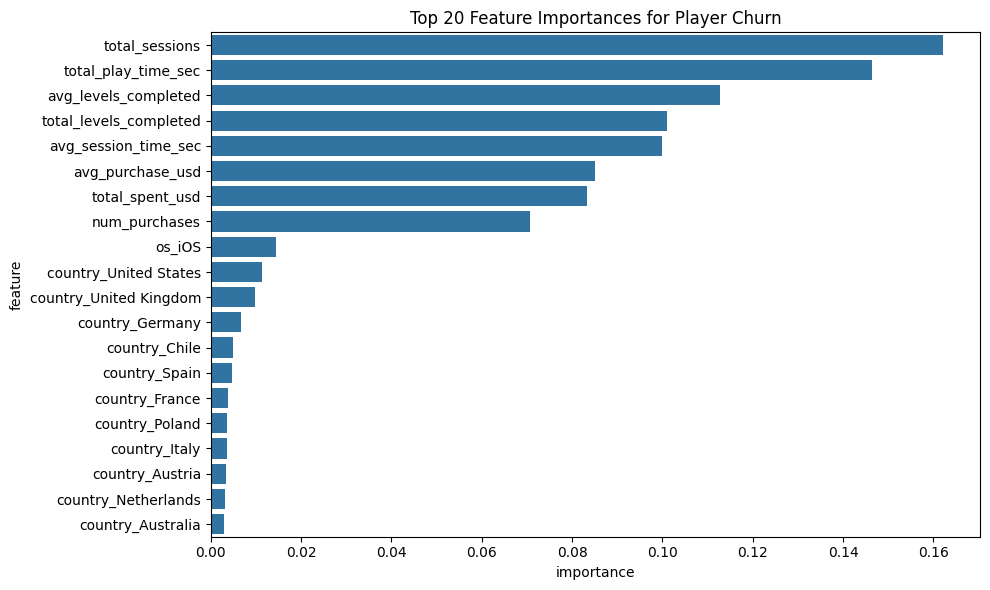

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.DataFrame({'feature': feat_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False).head(20)  # top 20 features

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title("Top 20 Feature Importances for Player Churn")
plt.tight_layout()
plt.show()
